In [30]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import numpy as np

In [44]:
barra_file = '/g/data/ob53/BARRA2/output/reanalysis/AUS-11/BOM/ERA5/historical/hres/BARRA-R2/v1/day/tasmax/v20231001/tasmax_AUS-11_ERA5_historical_hres_BOM_BARRA-R2_v1_day_197901-197901.nc'
ds_barra = xr.open_dataset(barra_file)
print(ds_barra)

<xarray.Dataset>
Dimensions:    (time: 31, lat: 646, lon: 1082, bnds: 2)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01T12:00:00 ... 1979-01-31T12:00:00
  * lat        (lat) float64 -57.97 -57.86 -57.75 -57.64 ... 12.76 12.87 12.98
  * lon        (lon) float64 88.48 88.59 88.7 88.81 ... 207.1 207.2 207.3 207.4
    height     float64 ...
  * bnds       (bnds) float64 0.0 1.0
Data variables:
    tasmax     (time, lat, lon) float64 ...
    time_bnds  (time, bnds) datetime64[ns] ...
Attributes: (12/56)
    axiom_version:             0.1.0
    axiom_schemas_version:     0.1.0
    axiom_schema:              cordex-1D.json
    productive_version:        edfab29
    Conventions:               CF-1.10, ACDD-1.3
    activity_id:               reanalysis
    ...                        ...
    date_modified:             2023-11-17T03:08:32Z
    date_metadata_modified:    2023-11-17T03:08:32Z
    history:                   Fri Oct 13 16:21:24 2023: /g/data/access/ngm/m...
    referenc

In [45]:
cordex_file = '/g/data/hq89/CCAM/output/CMIP6/DD/AUS-10i/CSIRO/ACCESS-CM2/ssp370/r4i1p1f1/CCAM-v2203-SN/v1-r1/day/tasmax/v20231206/tasmax_AUS-10i_ACCESS-CM2_ssp370_r4i1p1f1_CSIRO_CCAM-v2203-SN_v1-r1_day_20400101-20401231.nc'
ds_cordex = xr.open_dataset(cordex_file)
print(ds_cordex)

<xarray.Dataset>
Dimensions:   (time: 366, lat: 612, lon: 929, bnds: 2)
Coordinates:
  * lon       (lon) float64 89.2 89.3 89.4 89.5 89.6 ... 181.7 181.8 181.9 182.0
  * lat       (lat) float64 -52.4 -52.3 -52.2 -52.1 -52.0 ... 8.4 8.5 8.6 8.7
  * time      (time) datetime64[ns] 2040-01-01T12:00:00 ... 2040-12-31T12:00:00
Dimensions without coordinates: bnds
Data variables:
    tasmax    (time, lat, lon) float32 ...
    lat_bnds  (lat, bnds) float32 ...
    lon_bnds  (lon, bnds) float32 ...
Attributes: (12/28)
    axiom_version:           0.2.0
    axiom_schema:            CORDEX
    Conventions:             CF-1.10
    activity_id:             DD
    contact:                 ccam@csiro.au
    creation_date:           2023-12-27T21:27:03Z
    ...                      ...
    source_id:               CCAM-v2203-SN
    source_type:             AOGCM
    version_realisation:     v1-r1
    tracking_id:             211ccd58-3187-4a02-ac34-a7f73c592760
    variable_id:             tasmax
   

In [46]:
agcd_file = '/g/data/xv83/agcd-csiro/tmax/daily/tmax_AGCD-CSIRO_r005_20200101-20201231_daily.nc'
ds_agcd = xr.open_dataset(agcd_file)
print(ds_agcd)

<xarray.Dataset>
Dimensions:    (time: 366, bnds: 2, lon: 886, lat: 691)
Coordinates:
  * time       (time) datetime64[ns] 2020-01-01T09:00:00 ... 2020-12-31T09:00:00
  * lon        (lon) float32 112.0 112.1 112.1 112.2 ... 156.1 156.1 156.2 156.2
  * lat        (lat) float32 -44.5 -44.45 -44.4 -44.35 ... -10.1 -10.05 -10.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    lon_bnds   (lon, bnds) float32 ...
    lat_bnds   (lat, bnds) float32 ...
    tmax       (time, lat, lon) float32 ...
Attributes: (12/33)
    CDI:                           Climate Data Interface version 1.9.9rc1 (h...
    Conventions:                   CF-1.6
    history:                       Wed Apr 06 13:52:43 2022: /g/data/xv83/dbi...
    institution:                   Australian Bureau of Meteorology, GPO Box ...
    geospatial_lat_min:            -44.525
    geospatial_lat_max:            -9.975
    ...                            ...
    url:               

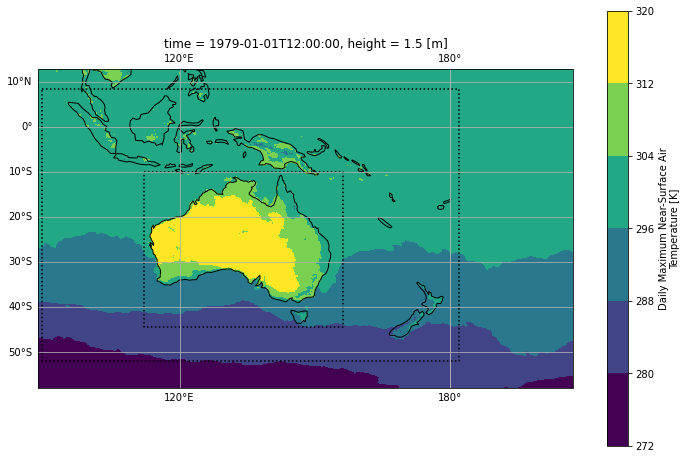

In [28]:
fig = plt.figure(figsize=[12, 8])
ax1 = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))

ds_barra['tasmax'].isel(time=0).plot.contourf(ax=ax1, transform=ccrs.PlateCarree())

cordex_west_lon = 89.5
cordex_east_lon = 182
cordex_south_lat = -52
cordex_north_lat = 8.5
ax1.plot(
    [cordex_west_lon, cordex_east_lon, cordex_east_lon, cordex_west_lon, cordex_west_lon],
    [cordex_north_lat, cordex_north_lat, cordex_south_lat, cordex_south_lat, cordex_north_lat],
    transform=ccrs.PlateCarree(),
    color='black',
    linestyle=':'
)

agcd_west_lon = 112
agcd_east_lon = 156.25
agcd_south_lat = -44.5
agcd_north_lat = -10
ax1.plot(
    [agcd_west_lon, agcd_east_lon, agcd_east_lon, agcd_west_lon, agcd_west_lon],
    [agcd_north_lat, agcd_north_lat, agcd_south_lat, agcd_south_lat, agcd_north_lat],
    transform=ccrs.PlateCarree(),
    color='black',
    linestyle=':'
)

ax1.coastlines()
ax1.add_feature(cartopy.feature.STATES)
ax1.gridlines(draw_labels=True)

plt.show()

In [32]:
cordex05_lats = np.round(np.arange(cordex_south_lat, cordex_north_lat + 0.005, 0.05), decimals=2)
cordex05_lons = np.round(np.arange(cordex_west_lon, cordex_east_lon + 0.005, 0.05), decimals=2)

In [34]:
len(cordex05_lats)

1211

In [36]:
len(cordex05_lons)

1851

In [47]:
print(ds_barra['tasmax'].sel(
    {
        'lat': slice(cordex_south_lat, cordex_north_lat),
        'lon': slice(cordex_west_lon, cordex_east_lon)
    }
))

<xarray.DataArray 'tasmax' (time: 31, lat: 550, lon: 841)>
[14339050 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01T12:00:00 ... 1979-01-31T12:00:00
  * lat      (lat) float64 -51.92 -51.81 -51.7 -51.59 ... 8.14 8.25 8.36 8.47
  * lon      (lon) float64 89.58 89.69 89.8 89.91 ... 181.6 181.8 181.9 182.0
    height   float64 ...
Attributes:
    long_name:      Daily Maximum Near-Surface Air Temperature
    standard_name:  air_temperature
    units:          K
    cell_methods:   time: maximum (interval: 1 hour) time: maximum (interval:...
